In [1]:
# 1

########## 12 September 2019 ##########
# In this notebook, we're taking the Master Catalog
# of NGC 6822 sources from UKIRT and Spitzer
# and making figures important for my paper.
#
# This will include spatial distribution plots,
# as well as potentially TRGB and metallicity,
# and pie charts for number distribution.
#
# As of September 2019, I have some updates to the
# Master Catalog, including changing any "RELIABLE"
# source with a [3.6] or [8.0] photometric uncertainty
# equal to -9999 (indicating an upper limit) to
# being "Unclassifiable".
#
# In addition, I have removed four of the previously-
# included star-forming regions used for "RELIABLE"
# YSO classification, since they're not correlated with
# any of the Hubble or new Spitzer SF regions.
#
# Finally, the entire Master Catalog needed to be
# examined in order to get rid of contaminants,
# both of previously-determined objects and of
# foreground objects.
#
# Once all this vetting has taken place, I can do
# the spatial distribution and metallicity analyses.


In [2]:
# 2

# First thing needed is to import the relevant Python libraries.

import numpy as np
import pandas as pd
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u


In [3]:
# 3

# Second thing needed is to read the catalog files,
# which include the overall Master Catalog, each of the
# "RELIABLE" O-rich, C-rich, and YSO catalogs,
# and the star-formation region locations.

MASTERCATALOG = pd.read_csv('MASTERCATALOG_FINAL_12Sept2019.csv')

Orich = pd.read_csv('Orich_reliable_12Sept2019.csv')
Crich = pd.read_csv('Crich_reliable_12Sept2019.csv')
YSO = pd.read_csv('YSO_reliable_11Sept2019.csv')

SFregions = ascii.read('SFreg_NGC6822.csv')


In [4]:
# 4

# This is Libby's code which takes the C-rich and O-rich star arrays
# and computes the C/O ratio and the error associated with that.

#----------------------#

def c2o_calc(number_cstars,number_mstars):
    """
    Calculculates the C/O ratio and error given:
    number_cstars : number of carbon stars
    number_mstars : number of m stars
    """

    c2o_pop    = number_cstars / number_mstars

    # Calculate error in population using poisson statistics
    err_cstars_pop = np.sqrt(number_cstars)
    err_mstars_pop = np.sqrt(number_mstars)

    # Calculate the error in c/o ratio
    c2o_err_pop = c2o_pop *np.sqrt(((err_mstars_pop  / number_mstars)**2)  + \
                                   ((err_cstars_pop  / number_cstars)**2))

    return c2o_pop, c2o_err_pop

def metallicity_calc(c2o_ratio,err_c2o_ratio):
    """
   Calculculates the metallicity and error using the Cioni (2009) relation:
    [Fe/H] = (-1.39 +/- 0.06) - (0.47 +/- 0.10) * log(C/M)

    given:-
    c2o_ratio: The ratio of C/M stars
    err_c2o_ratio: The error in the C/M ratio
    """
    # There are 8 possble permuntations in the [Fe/H] value accounting for the errors
    # The largest possible range is the error is calculated below:

    if (c2o_ratio - err_c2o_ratio > 0.):

        calc_Fe_H_pop    = -1.39 - (0.47 *np.log10(c2o_ratio))

        # Gives highest metallicity value  eg   Fe/H = -0.89
        err1_calc_Fe_H_pop  = abs(calc_Fe_H_pop - (-1.33 - (0.57 * np.log10(c2o_ratio - err_c2o_ratio))))
        # Gives most metal poor value      Vs  Fe/H = -1.33 - This is correct
        err2_calc_Fe_H_pop  = abs((-1.45 - (0.37 * np.log10(c2o_ratio + err_c2o_ratio)))- calc_Fe_H_pop)

    elif (c2o_ratio > 0.) :
        calc_Fe_H_pop       = -1.39 - (0.47 *np.log10(c2o_ratio))
        err1_calc_Fe_H_pop  = 0.0
        err2_calc_Fe_H_pop  = abs((-1.45 - (0.37 * np.log10(c2o_ratio + err_c2o_ratio)))- calc_Fe_H_pop)
    else:
        calc_Fe_H_pop       = 0.0
        err1_calc_Fe_H_pop  = 0.0
        err2_calc_Fe_H_pop  = 0.0

    return calc_Fe_H_pop, err1_calc_Fe_H_pop, err2_calc_Fe_H_pop


In [5]:
# 5

# This prints out the C/O ratio and its associated error.
# By the way, you can say "print(ratio_C_O[0]" to get just the ratio,
# or "print(ratio_C_O[1])" to get just the error

ratio_C_O = c2o_calc(len(Crich), len(Orich))
print(ratio_C_O)

print('')

# This calculates and prints out the [Fe/H] with error based on the C/O ratio.

ratio_Fe_H = metallicity_calc(ratio_C_O[0], ratio_C_O[1])
print(ratio_Fe_H)

# NB this is for the entire sample


(0.23911187019641333, 0.01124766522247959)

(-1.0979425340468323, 0.13406715275657777, 0.12952619663612341)


In [6]:
# 6

# Okay, so the C/M ratio is 0.239 +/- 0.011 for the entirety of our NGC 6822 coverage,
# which gives an [Fe/H] = -1.098 +/- 0.132.
#
# The next thing we can look at is how this changes as a function of position.

# Read in the SF regions in NGC 6822
#SFregions = ascii.read('/Users/ahirschauer/Documents/Year2/03-2019/NGC6822/SFreg_NGC6822.csv')
# ^ already done earlier

# Parse this into coordinates and angle units
ra_decSFR = SkyCoord(SFregions['RA'], SFregions['Dec'], unit=(u.deg, u.deg), frame='fk5')
radSFR = Angle(SFregions['Radius'] * u.arcsec)

# In an earlier Python notebook, we then used the work from the previous few cells
# to make a plot of the galaxy plus regions encapsulating where the star-forming regions
# are, based on the population of YSO candidates.
#
# Since we've already done this (and made the plots already), I'm skipping this to move on
# to other things, like the spatial distribution of the various stellar types
# as defined by the color-cut analyses.


Box width is 2.4 arcmin
Box height is 1.8 arcmin
Box area is 4.32 arcmin2

Total FOV area is 418.5 arcmin2
The ratio of the total FOV to the box is  96.87



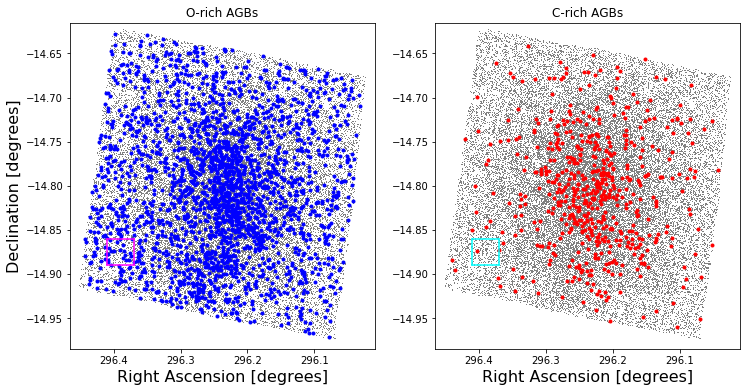

In [7]:
# 7

# This cell makes an RA vs. Dec plot of NGC 6822
# which is essentially a synthetic map of the galaxy.
#
# It includes the "RELIABLE" O-rich stars (blue) and
# the "RELIABLE" C-rich stars (red).
#
# You can also use it to plot "RELIABLE" YSOs.
#
# Also included are the small boxes used to compute
# contamination percentages for each object type.

from astropy import units as u

minRA=296.37*u.degree
maxRA=296.41*u.degree
minDec=-14.89*u.degree
maxDec=-14.86*u.degree

minRA=minRA.to(u.arcmin)
maxRA=maxRA.to(u.arcmin)
minDec=minDec.to(u.arcmin)
maxDec=maxDec.to(u.arcmin)
box_width=(maxRA-minRA)
print('Box width is',round(box_width.value,2),box_width.unit)
box_height=maxDec-minDec
print('Box height is',round(box_height.value,2),box_height.unit)
box_area=box_width*box_height
print('Box area is',round(box_area.value,2),box_area.unit)
print('')

minRA=minRA.to(u.deg)
maxRA=maxRA.to(u.deg)
minDec=minDec.to(u.deg)
maxDec=maxDec.to(u.deg)

FOV_width=0.375*u.deg
FOV_width=FOV_width.to(u.arcmin)
FOV_length=0.31*u.deg
FOV_length=FOV_length.to(u.arcmin)
FOV_area=FOV_width*FOV_length

print("Total FOV area is",round(FOV_area.value,2),FOV_area.unit)

ratio_area=FOV_area/box_area
print("The ratio of the total FOV to the box is ",round(ratio_area.value,2))
print('')

x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]

x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]

x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]

x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]

#plt.figure(figsize=(18,6))
#ax1 = plt.subplot(131)
#ax2 = plt.subplot(132)
#ax3 = plt.subplot(133)

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
#ax3 = plt.subplot(111)

ax1.set_ylim(-14.985, -14.615)
ax1.set_xlim(296.465, 296.01)
ax1.plot(MASTERCATALOG.RA, MASTERCATALOG.Dec, ',', color='gray')
ax1.plot(Orich.RA, Orich.Dec, '.', color='blue')
ax1.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')
ax1.set_xlabel('Right Ascension [degrees]', size=16)
ax1.set_ylabel('Declination [degrees]', size=16)
ax1.set_title('O-rich AGBs')
#ax1.grid(True)

ax2.set_ylim(-14.985, -14.615)
ax2.set_xlim(296.465, 296.01)
ax2.plot(MASTERCATALOG.RA, MASTERCATALOG.Dec, ',', color='gray')
ax2.plot(Crich.RA, Crich.Dec, '.', color='red')
ax2.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')
ax2.set_xlabel('Right Ascension [degrees]', size=16)
#ax2.set_ylabel('Declination [degrees]', size=16)
ax2.set_title('C-rich AGBs')
#ax2.grid(True)

#ax3.set_ylim(-14.985, -14.615)
#ax3.set_xlim(296.465, 296.01)
#ax3.plot(MASTERCATALOG.RA, MASTERCATALOG.Dec, ',', color='gray')
#ax3.plot(YSO.RA, YSO.Dec, '.', color='darkviolet')
#ax3.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')
#ax3.set_xlabel('Right Ascension [degrees]', size=16)
#ax3.set_ylabel('Declination [degrees]', size=16)
#ax3.set_title('YSOs')
#ax3.grid(True)

#plt.grid(True)
plt.show()
#plt.close()
#plt.savefig('spatdist_AGBs.pdf')


Box width is 2.4 arcmin
Box height is 1.8 arcmin
Box area is 4.32 arcmin2

Total FOV area is 418.5 arcmin2
The ratio of the total FOV to the box is  96.87



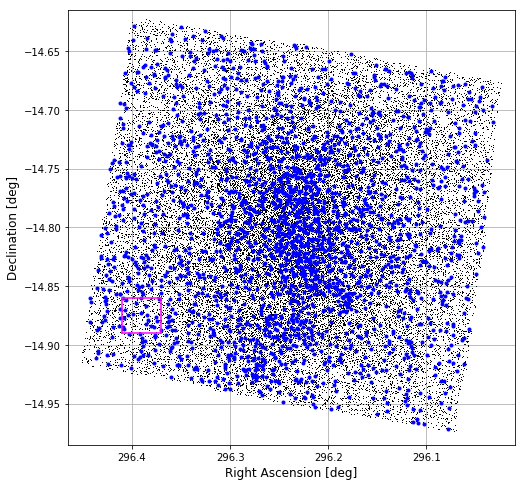

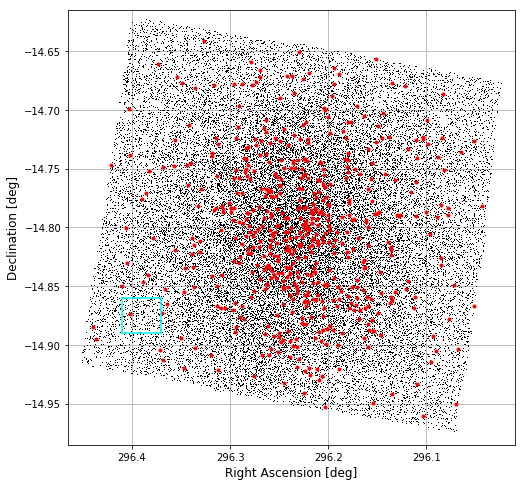

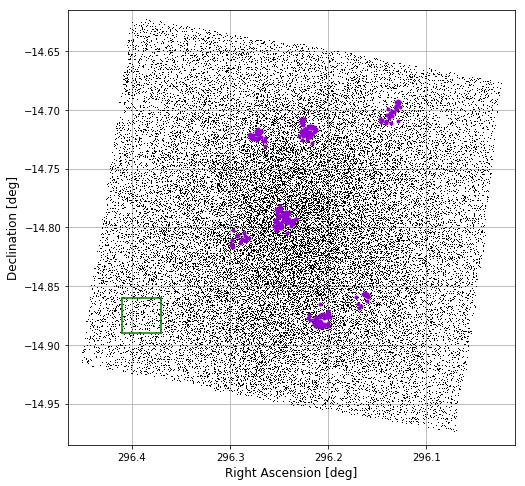

In [8]:
# 8

# The next two cells are large ones which compute contamination
# for each stellar type based on a small off-target box.
#
# In a previous notebook, I had done the calculation for the
# "RELIABLE" sources, plus each type of source in each of the three
# diagnostic CMDs.
#
# Since the "RELIABLE" catalogs have been revised based on the
# contamination analyses, etc., these numbers will have changed
# compared to what is currently in Table 9.
#
# But the individual CMDs' numbers should stay the same!

##########

# Time to start figuring out the contaminants for my MASTER CATALOG.
#
# Libby sent me a string of Python code on August 3rd which she has used
# for her upcoming paper on YSOs in NGC 6822.
#
# As she describes it, the code does the following:
#
# 1) counts the YSOs found by that cut which are in the box.
# 2) Then devides this by the area of the box to give contamination per degsq.
# 3) scales this to the observed FOV;
# 4) compares to the total colour selected catalogue of YSOs to get a contamination percentage.
#
# The region Libby specifies in her code is "not completely ideal but its off the bar and
# far enough away from anything major that we know of".
#
# She also specifies that this code works to determine contamination percentage of
# ONE stellar type (in her case, YSOs), for ONE CMD, and that I would need to do run this
# for EACH stellar type (in my case, O-rich AGBs, C-rich AGBs, and YSOs)
# and for EACH of the CMDs (CMD1, CMD2, CMD3).
#
# This totals three runs of the code for each of the three CMDs, totaling *nine* times.
#
# I will copy+paste her code here and try to modify it to fit my data.

from astropy import units as u

minRA=296.37*u.degree
maxRA=296.41*u.degree
minDec=-14.89*u.degree
maxDec=-14.86*u.degree

minRA=minRA.to(u.arcmin)
maxRA=maxRA.to(u.arcmin)
minDec=minDec.to(u.arcmin)
maxDec=maxDec.to(u.arcmin)
box_width=(maxRA-minRA)
print('Box width is',round(box_width.value,2),box_width.unit)
box_height=maxDec-minDec
print('Box height is',round(box_height.value,2),box_height.unit)
box_area=box_width*box_height
print('Box area is',round(box_area.value,2),box_area.unit)
print('')

minRA=minRA.to(u.deg)
maxRA=maxRA.to(u.deg)
minDec=minDec.to(u.deg)
maxDec=maxDec.to(u.deg)

FOV_width=0.375*u.deg
FOV_width=FOV_width.to(u.arcmin)
FOV_length=0.31*u.deg
FOV_length=FOV_length.to(u.arcmin)
FOV_area=FOV_width*FOV_length

print("Total FOV area is",round(FOV_area.value,2),FOV_area.unit)

ratio_area=FOV_area/box_area
print("The ratio of the total FOV to the box is ",round(ratio_area.value,2))
print('')

x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]

x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]

x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]

x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]

#plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
# Alec's note:
# This plt.plot command creates a black box which, without other context,
# just looks like a black box.
# Libby sent a screen shot which shows that, when you use this code in
# conjunction with the rest of your data, you select a small region of space
# in the lower-right corner of the synthetic galaxy map.
# It is within this box that the contamination percentages are calculated.

# "RELIABLE" O-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCATALOG.RA, MASTERCATALOG.Dec, ',', color='black')
plt.plot(Orich.RA, Orich.Dec, '.', color='blue')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='magenta')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

# "RELIABLE" C-rich

plt.figure(figsize=(8,8))
plt.plot(MASTERCATALOG.RA, MASTERCATALOG.Dec, ',', color='black')
plt.plot(Crich.RA, Crich.Dec, '.', color='red')
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='cyan')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

# "RELIABLE" YSOs

plt.figure(figsize=(8,8))
plt.plot(MASTERCATALOG.RA, MASTERCATALOG.Dec, ',', color='black')
plt.plot(YSO.RA, YSO.Dec, '.', color='darkviolet')

plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='green')

plt.xlim(296.465, 296.01)
plt.ylim(-14.985, -14.615)

plt.xlabel('Right Ascension [deg]', size=12)
plt.ylabel('Declination [deg]', size=12)
plt.grid(True)

plt.show()
plt.close()


In [9]:
# 9

# The above cell (#8) is used to define a small area in the field
# covered by the MASTERCATALOG to compute contamination for a given
# type of stellar source (O-rich AGBs, C-rich AGBs, and YSOs).
#
# The next bit of code sent to me by Libby then compares the objects
# found within that box and compares it to the whole sample,
# counting the number of "RELIABLE" sources of whatever you're comparing.
#
# It counts the total number of all sources, just the "RELIABLE" sources,
# then uses this information to compute the number of contaminants
# per square arcminute, then an average in the entire FoV, and compares with
# the color-cut-selected number of "RELIABLE" sources to give a percentage value.

# Count total number of sources in off-target box

idx_total_sources_box=np.where((MASTERCATALOG['RA']<(maxRA.value))&(MASTERCATALOG['RA']>(minRA.value))&(MASTERCATALOG['Dec']<(maxDec.value))&(MASTERCATALOG['Dec']>(minDec.value)))

num_total_sources_box=len(idx_total_sources_box[0])

print('The total number of (black and blue/red/violet) sources in the box is',num_total_sources_box)
print('')

#
# Count number of "RELIABLE" O-rich AGBs in off-target box
#

box_idx=np.where((Orich['RA']<(maxRA.value))&(Orich['RA']>(minRA.value))&(Orich['Dec']<(maxDec.value))&(Orich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of reliable O-rich AGBs (blue) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected O-rich AGBs in the entire FOV is",str(len(Orich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(Orich)),2),"%")
print('')

#
# Count number of "RELIABLE" C-rich AGBs in off-target box
#

box_idx=np.where((Crich['RA']<(maxRA.value))&(Crich['RA']>(minRA.value))&(Crich['Dec']<(maxDec.value))&(Crich['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of reliable C-rich AGBs (red) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected C-rich AGBs in the entire FOV is",str(len(Crich)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(Crich)),2),"%")
print('')

#
# Count number of "RELIABLE" YSOs in off-target box
#

box_idx=np.where((YSO['RA']<(maxRA.value))&(YSO['RA']>(minRA.value))&(YSO['Dec']<(maxDec.value))&(YSO['Dec']>(minDec.value)))

num_contam=len(box_idx[0])

print('The number of reliable YSOs (violet) in the box is',num_contam)

# Calculate contamination statistics

print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

scaled_contam_num=ratio_area*num_contam

print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of colour-selected YSOs in the entire FOV is",str(len(YSO)))

print("Therfore the contamination percentage is",round((100*scaled_contam_num.value/len(YSO)),2),"%")
print('')


The total number of (black and blue/red/violet) sources in the box is 212

The number of reliable O-rich AGBs (blue) in the box is 19
There are 4.4 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  1840.62
The number of colour-selected O-rich AGBs in the entire FOV is 2342
Therfore the contamination percentage is 78.59 %

The number of reliable C-rich AGBs (red) in the box is 1
There are 0.23 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  96.87
The number of colour-selected C-rich AGBs in the entire FOV is 560
Therfore the contamination percentage is 17.3 %

The number of reliable YSOs (violet) in the box is 0
There are 0.0 sources of contamination per square arcmin (2d.p.)
The average number of contaminants in the entire FOV is  0.0
The number of colour-selected YSOs in the entire FOV is 283
Therfore the contamination percentage is 0.0 %



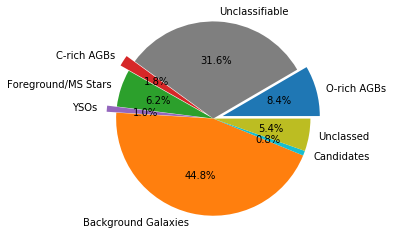

In [10]:
# 10

# Once I get FINAL numbers for the "RELIABLE" catalogs,
# I can actually move forward with things like plotting
# spatial distribution, pie charts, metallicity, etc.
#
# For now, let's put in place the cells necessary to do so
# once these numbers are ready.

# For the figure which represents the breakdown of the
# overall population of different source types, I'd like to
# use a pie chart.
#
# Previously this had been used for all "RELIABLE" sources,
# then changed to only the dusty and evolved stars, with
# the "CANDIDATE" pie chart next to it.
#
# What I'd like to do instead is a pie chart of everything
# in the master catalog, then the "RELIABLE" dusty/evolved
# stars in a second pie chart next to it.
#
# "CANDIDATE" sources won't have their own pie chart anymore,
# but will be included in the first, 'master' pie chart.

labels = 'O-rich AGBs', 'Unclassifiable', 'C-rich AGBs', 'Foreground/MS Stars', 'YSOs', 'Background Galaxies', 'Candidates', 'Unclassed'
data_reliable = [2583, 9706, 563, 1911, 310, 13765, 247, 1660]
colors_reliable = ['tab:blue', 'tab:gray', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange', 'tab:cyan', 'tab:olive']
explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0)

plt.pie(data_reliable, explode=explode, labels=labels, colors=colors_reliable, autopct='%1.1f%%',
        shadow=False, startangle=0)

plt.axis('equal')
plt.show()


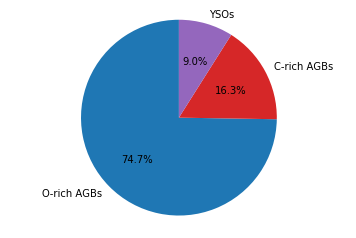

In [11]:
# 11

labels = 'O-rich AGBs', 'C-rich AGBs', 'YSOs'
data_reliable2 = [2583, 563, 310]
colors_reliable2 = ['tab:blue', 'tab:red', 'tab:purple']
explode = (0, 0, 0)

plt.pie(data_reliable2, explode=explode, labels=labels, colors=colors_reliable2, autopct='%1.1f%%',
        shadow=False, startangle=90)

plt.axis('equal')
plt.show()


In [12]:
# 12

# NGC 6822's angle of rotation is at 330 degrees (McConnachie 2012).
# What does the metallicity gradient look like if I split it
# down the middle, rather than a straight North/South cut?
